In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
# Generate the signal
def generate_data(length=2500,t=0,step_size=0.05):
    for count in range(length):
        t += step_size
        signal = np.sin(2*np.pi*t)
        damper = np.exp(-t/8.0)
        yield t, signal * damper

In [4]:
# Initializer function
def initializer():
    peak_val = 1.0
    buffer_val = 0.1
    
    ax.set_ylim(-peak_val * (1+buffer_val), peak_val * (1+buffer_val))
    ax.set_xlim(0,10)
    del x_vals[:]
    del y_vals[:]
    line.set_data(x_vals, y_vals)
    return line

In [5]:
def draw(data):
    # update the data
    t, signal = data
    x_vals.append(t)
    y_vals.append(signal)
    x_min, x_max = ax.get_xlim()
    
    if t>=x_max:
        ax.set_xlim(x_min, 2*x_max)
        ax.figure.canvas.draw()
        
    line.set_data(x_vals, y_vals)
    return line

In [6]:
# Create the figure
fig, ax = plt.subplots()
ax.grid()

In [7]:
# Extract the line
line, = ax.plot([],[],lw=1.5)

In [8]:
# Create the variables
x_vals, y_vals = [], []

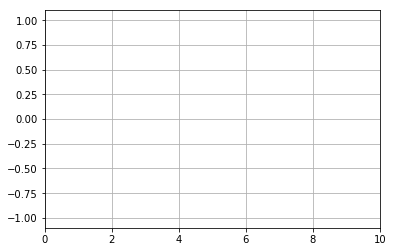

In [9]:
# Define the animator object
animator = animation.FuncAnimation(fig, draw, generate_data,
                                  blit=False, interval=10, repeat=False,
                                  init_func=initializer)

plt.show()